# Clustering and PCA

In this assignment, you will be exploring difference between clique and kmeans algorithms for clustering and will get better understanding of PCA & Kmeans algorithms by manually implementing both of them.

--------------------

In [2]:
from sklearn.datasets import make_moons, make_blobs
import numpy as np
from pyclustering.cluster.clique import clique, clique_visualizer
from sklearn.cluster import KMeans

In [3]:
X, y = make_moons(n_samples=250, noise=0.05, random_state=42)

# Questoin 1
Scatter plot the dataset

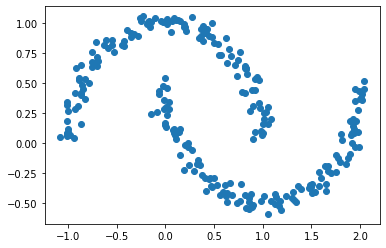

In [4]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1])

# Question 2
In your opinon, how well will K-Means perform on the above dataset? Explain.

- K-Means will not perform well on the above dataset as its result will be not accurate because of many variations.

- The density spread of data points across the data space is different and the data points follow non-convex shapes.

# Question 3
1. Use Elbow method to find best "k". (Use inertia as metric).
2. Plot the elbow graph.
3. Train KMeans model using "k = 2".
4. Comment on the results.

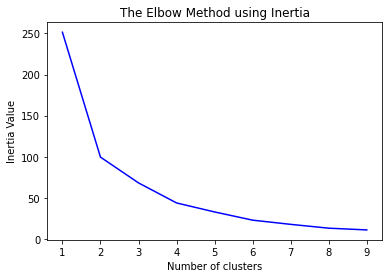

In [5]:
Inertia_metric = [] 
for i in range(1, 10): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X) 
    Inertia_metric.append(kmeans.inertia_)

plt.plot(range(1, 10), Inertia_metric, color='blue')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Value')
plt.title('The Elbow Method using Inertia')
plt.show()


In [6]:

kmean = KMeans(n_clusters=2)
kmean.fit(X)

KMeans(n_clusters=2)

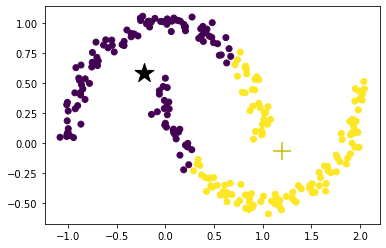

In [7]:
plt.scatter(X[:,0], X[:,1], c=kmean.labels_.astype(float))
centroids = kmean.cluster_centers_
plt.scatter(centroids[0, 0], centroids[0, 1], marker='*', s=400, c='k')
plt.scatter(centroids[1, 0], centroids[1, 1], marker='+', s=300, c='y')

- Best K --> 2

- kmeans couldn’t figure out the correct clusters and sentroids for the dataset as shown in the upper graph

- It should cluster each ring separately and for the centroids, the 1st one should be in the middle of the 1st ring and the 2nd should be in the middle of the 2nd ring.

# Question 4
1. If you are going to use clique, what is a proper threshold value for the above dataset.

    - A proper threshold = 0 because any threshold bigger than 0 results in more clusters also when threshold = 0, Minimum number of points = 0 that should contain CLIQUE block to consider its points as non-outliers



2. Find the best interval value that cluster the data into two clusters, plot the results.

    - Based on the shown intervals below, the best interval is 8. The number of grids is determined by intervals, the bigger the interval, the more the grids will be.



3. Why do you think clique performed better on this dataset in comparison with KMeans?

    - Clique performed better on this dataset as it deals properly with many variations while K-Means doesn't.

    - CLIQUE can find clusters of any shape and is able to find any number of clusters in any number of dimensions, where the number is not predetermined by a parameter.

    - CLIQUE takes advantage of the grid-based clustering algorithms and the density-based clustering algorithms

Interval number is 1
Amount of clusters: 1


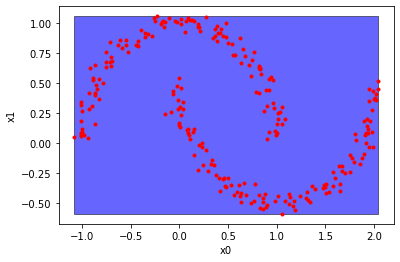

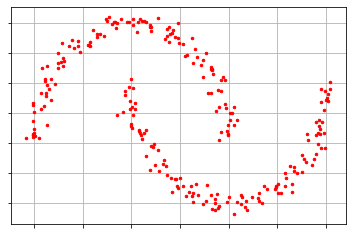

Interval number is 2
Amount of clusters: 1


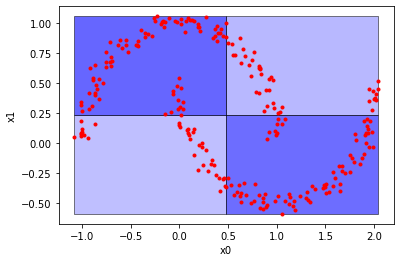

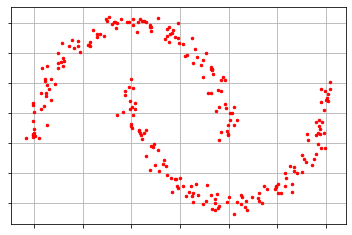

Interval number is 3
Amount of clusters: 1


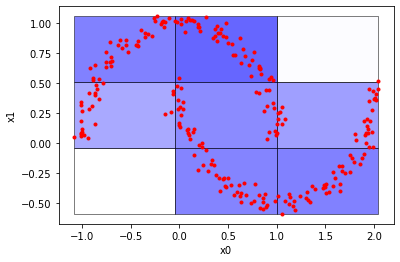

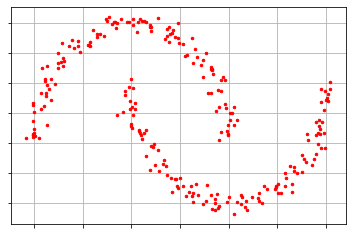

Interval number is 4
Amount of clusters: 1


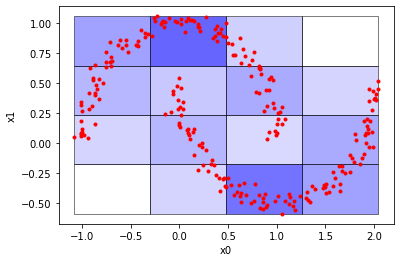

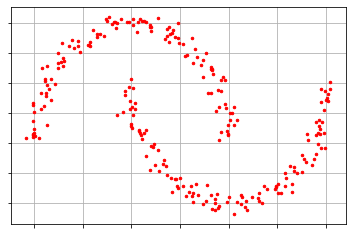

Interval number is 5
Amount of clusters: 1


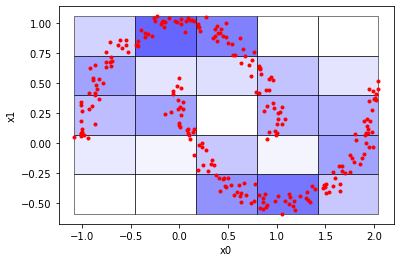

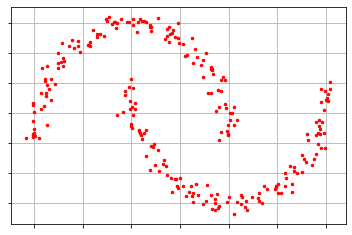

Interval number is 6
Amount of clusters: 1


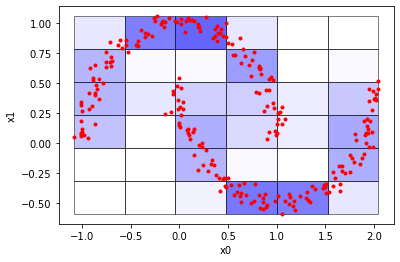

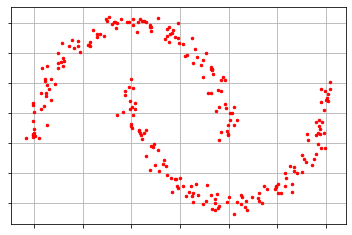

Interval number is 7
Amount of clusters: 1


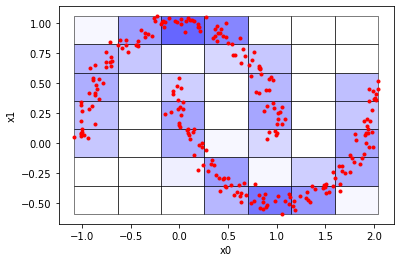

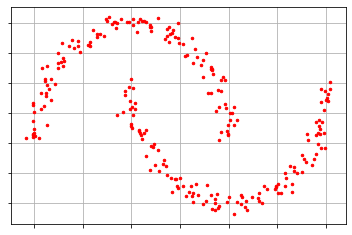

Interval number is 8
Amount of clusters: 2


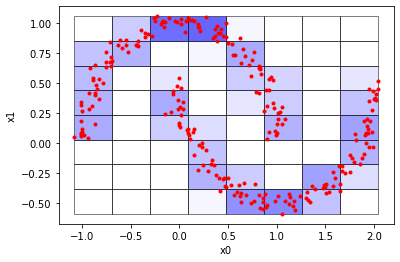

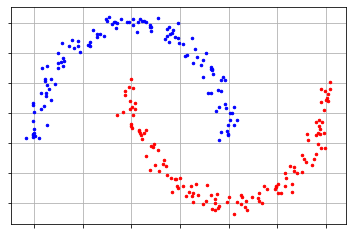

Interval number is 9
Amount of clusters: 1


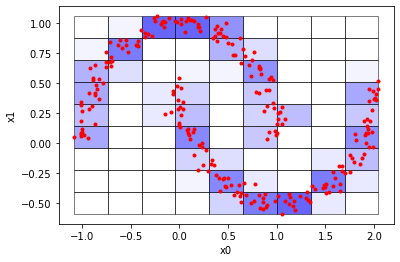

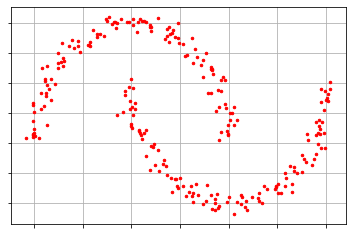

In [8]:
threshold = 0
for interval in range(1, 10):
  clique_instance = clique(X, interval, threshold)
  clique_instance.process()
  clusters = clique_instance.get_clusters()  
  noise = clique_instance.get_noise()     
  cells = clique_instance.get_cells() 

  print("Interval number is",interval)    
  print("Amount of clusters:", len(clusters))

  clique_visualizer.show_grid(cells, X)
  clique_visualizer.show_clusters(X, clusters, noise)

# Question 5
For the following dataset
1. Run kmeans algorithm clustering using k=2.
2. Run clique algorithm using interval = 15 and threshold = 6.
3. Plot results of both algorithms.
4. Comment on the following
    
    * What is the number of clusters in case of clique? and why? 

        - Clusters are 4 in case of clique

        - The data space is divided into a grid structure of finite cells, and all processing is based on a single cell. CLIQUE clustering finds dense regions (collections of units) in a sparse data set. The attribute values or points and ranges of these regions characterize the clusters automatically finds the dense units.

        - The clustering process in CLIQUE involves first dividing the number of dimensions into non-overlapping rectangular units called grids according to the given grid size and then find out the dense region according to a given threshold value. Since threshold value is identified as 6 so it divided the clusters into 4. When each grid box has dots less than 6(the threshold) it was considered another outliers so it formed another clusters 

    * Why do kmeans fail to cluster such data?

        - In the Kmeans method the clusters are formed by portioning the objects into k clusters. Number of clusters will be equal to the number of partitions. Kmeans is a process of repeatedly moving the center point of a class, moving the center point of the class, also weighing the center of gravity (centroids), to the average position of its containing members, and then re-dividing its internal members.
        
        - It did not work properly becuase the data is hard to partition since it has high density so the kmeans identified wrong centers and didn't partition accurately it partioned according to wrong center points

In [9]:
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state, centers=2)
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

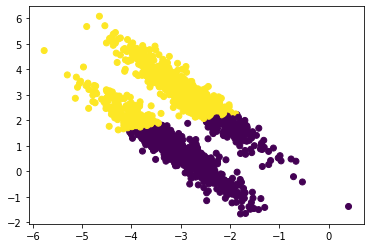

In [10]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_aniso)
plt.scatter(X_aniso[:,0], X_aniso[:,1],c=kmeans.labels_)

Amount of clusters: 4


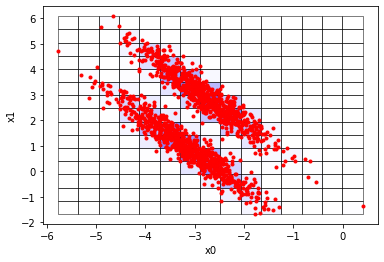

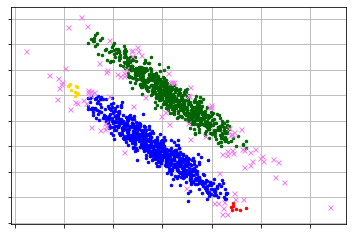

In [11]:
intervals = 15  
threshold = 6   
clique_instance = clique(X_aniso, intervals, threshold)

clique_instance.process()
clusters = clique_instance.get_clusters()  
noise = clique_instance.get_noise()     
cells = clique_instance.get_cells()
print("Amount of clusters:", len(clusters))

clique_visualizer.show_grid(cells, X_aniso)
clique_visualizer.show_clusters(X_aniso, clusters, noise)

# Question 6

Write your own PCA function that will return:
* The sorted eigenvectors of principal components
* The corresponding eigenvalues
* The transformed data

Note, please make sure that the data is centered before transformation (i.e., the sample
mean subtracted out) but not normalized.

In [12]:
def PCA(X , n_components):
     
    # Subtract mean from the data
    X_meaned = X - np.mean(X , axis = 0)
     
    # Calculate Covariance Matrix
    cov_mat = np.cov(X_meaned , rowvar = False)
     
    # Calculate Eigen Values,Eigen Vectors
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
     
    # Sort Eigen Vectors corresponding to eigrn values in descending order
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]

    # Get the Feature Vector
    future_vector = sorted_eigenvectors[:,0:n_components]
     
    # Recast the data along the principal components axes
    transformed_data = np.dot(future_vector.transpose() , X_meaned.transpose()).transpose()
     
    return future_vector, sorted_eigenvalue[0:n_components], transformed_data

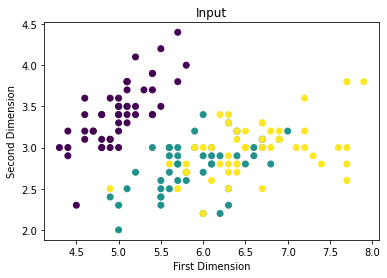

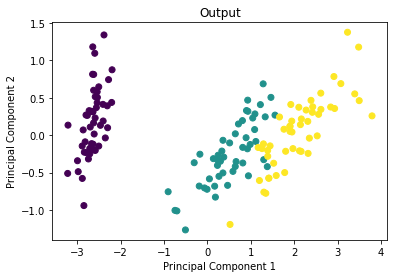

In [13]:
from sklearn import datasets

data = datasets.load_iris()
X = data.data
y = data.target

plt.scatter(X[:,0],X[:,1], c=y)
plt.title('Input')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.show()


future_vector, sorted_eigenvalue, transformed_data = PCA(X,2)

plt.scatter(transformed_data[:,0]*-1,transformed_data[:,1],c=y)
plt.title('Output')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

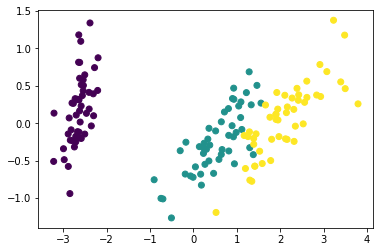

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
components = pca.fit_transform(X)
fig = plt.scatter(components[:,0],components[:,1],c=y)

# Question 7
Write your own K-means clustering, where the Euclidian distance is used to evaluate
the distance/ similarity between the dataset. The input to this function should be:
* The number of clusters
* The dataset

The output should be:
* The list of cluster centers

In [22]:
from scipy.spatial.distance import cdist 
 
def Kmeans(x,n_clusters):
    no_of_iterations = 50
    idx = np.random.choice(len(x), n_clusters, replace=False)
    #Randomly choosing Centroids 
    centroids = x[idx, :] #Step 1
     
    #finding the distance between centroids and all the data points
    distances = cdist(x, centroids ,'euclidean')
     
    #Centroid with the minimum Distance
    points = np.array([np.argmin(i) for i in distances])
     
    #Repeating the above steps for a defined number of iterations
    #Step 4
    for _ in range(no_of_iterations): 
        centroids = []
        for idx in range(n_clusters):
            #Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x[points==idx].mean(axis=0) 
            centroids.append(temp_cent)
 
        centroids = np.vstack(centroids) #Updated Centroids 
         
        distances = cdist(x, centroids ,'euclidean')
        points = np.array([np.argmin(i) for i in distances])

    plt.scatter(x[:,0],x[:,1], c=points)
    plt.scatter(centroids[:,0],centroids[:,1], color='k', marker='o', s=300, zorder=2)
    plt.show()

    return centroids 


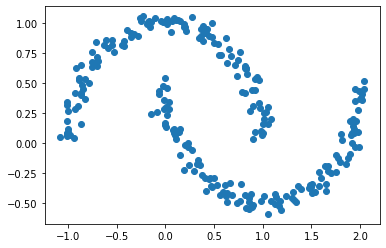

In [16]:
X, y = make_moons(n_samples=250, noise=0.05, random_state=42)

plt.scatter(X[:,0], X[:,1])


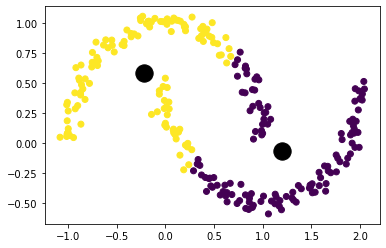

array([[ 1.19954086, -0.07033668],
       [-0.21580413,  0.58471364]])

In [26]:

Kmeans(X, 2)

[[ 1.19954086 -0.07033668]
 [-0.21580413  0.58471364]]


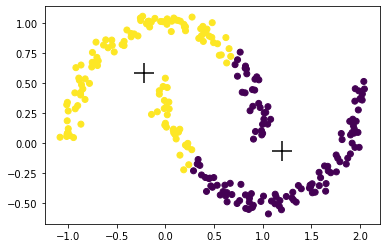

In [27]:
kmean = KMeans(n_clusters=2)
kmean.fit(X)
plt.scatter(X[:,0], X[:,1], c=kmean.labels_.astype(float))
centroids = kmean.cluster_centers_
print(centroids)
plt.scatter(centroids[:,0],centroids[:,1],marker='+',s=400,c='k')